<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مشکل بیش‌برازش داده‌ها یا Overfitting و معرفی Dropout</div></center></h1>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">شبکه بدون Dropout</div>



In [2]:
!wget https://github.com/azii22000/deeplearning-tensorflow2-notebooks/raw/master/dataset.py
!wget https://github.com/azii22000/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_hoda_full.mat -P dataset

--2023-11-24 13:11:46--  https://github.com/azii22000/deeplearning-tensorflow2-notebooks/raw/master/dataset.py
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/azii22000/deeplearning-tensorflow2-notebooks/master/dataset.py [following]
--2023-11-24 13:11:46--  https://raw.githubusercontent.com/azii22000/deeplearning-tensorflow2-notebooks/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 917 [text/plain]
Saving to: ‘dataset.py’

dataset.py          100%[===================>]     917  --.-KB/s    in 0s      

2023-11-24 13:11:47 (54.5 MB/s) - ‘dataset.py’ saved [917/917]

--2023-11-2

In [4]:
# 1. Import libraries and modules
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)  # for reproducibility

# 2. Load pre-shuffled HODA data into train and test sets
x_train, y_train_original, x_test, y_test_original = load_hoda()

# 3. Preprocess input data- Normalize
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels- One-Hot
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

# 5. Define model architecture
model = Sequential()
model.add(Dense(60, activation='relu', input_dim=25))
model.add(Dense(300, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(x_train, y_train,
          epochs=150,
          batch_size=128, validation_data=(x_test, y_test))


Epoch 1/150
8/8 [==============================] - 1s 31ms/step - loss: 2.2126 - accuracy: 0.2760 - val_loss: 2.0861 - val_accuracy: 0.3700
Epoch 2/150
8/8 [==============================] - 0s 10ms/step - loss: 1.9309 - accuracy: 0.5230 - val_loss: 1.8245 - val_accuracy: 0.5950
Epoch 3/150
8/8 [==============================] - 0s 10ms/step - loss: 1.6276 - accuracy: 0.6610 - val_loss: 1.5089 - val_accuracy: 0.7000
Epoch 4/150
8/8 [==============================] - 0s 10ms/step - loss: 1.3003 - accuracy: 0.7350 - val_loss: 1.1869 - val_accuracy: 0.7800
Epoch 5/150
8/8 [==============================] - 0s 11ms/step - loss: 1.0001 - accuracy: 0.7860 - val_loss: 0.9061 - val_accuracy: 0.8250
Epoch 6/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7747 - accuracy: 0.8310 - val_loss: 0.7211 - val_accuracy: 0.8500
Epoch 7/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6228 - accuracy: 0.8370 - val_loss: 0.5881 - val_accuracy: 0.8750
Epoch 8/150
8/8 [====

Test Accuracy: 0.9200000166893005 
Maximum Test Acuracy During Training:  0.9449999928474426


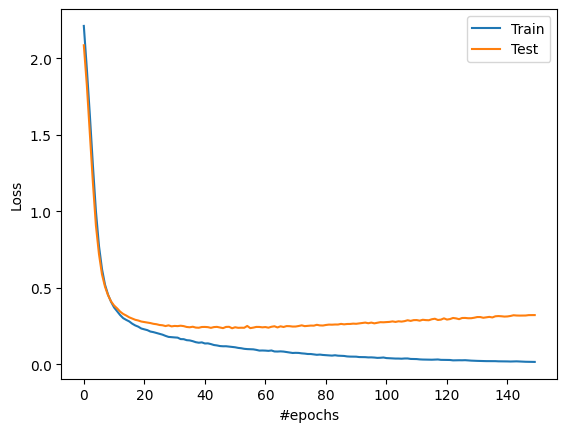

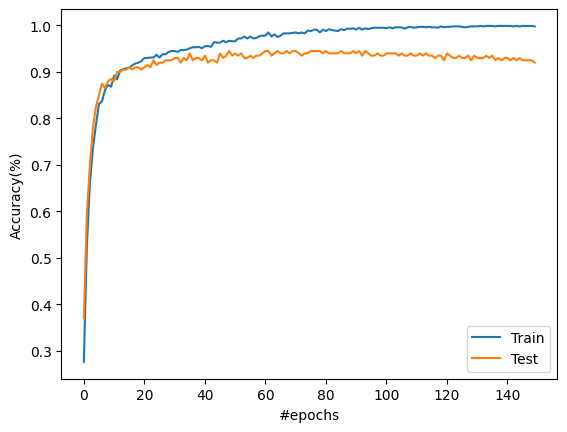

In [5]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ",
      max(history.history['val_accuracy']))

plt.figure(1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">شبکه با Dropout</div>



In [6]:
# 1. Import libraries and modules
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)  # for reproducibility

# 2. Load pre-shuffled HODA data into train and test sets
x_train, y_train_original, x_test, y_test_original = load_hoda()

# 3. Preprocess input data
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

# 5. Define model architecture
model = Sequential()
model.add(Dense(60, activation='relu', input_dim=25))
model.add(Dropout(0.2))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(x_train, y_train,
          epochs=150,
          batch_size=128, validation_data=(x_test, y_test))


Epoch 1/150
8/8 [==============================] - 1s 37ms/step - loss: 2.2734 - accuracy: 0.1430 - val_loss: 2.1408 - val_accuracy: 0.2600
Epoch 2/150
8/8 [==============================] - 0s 10ms/step - loss: 2.0459 - accuracy: 0.3300 - val_loss: 1.9486 - val_accuracy: 0.4850
Epoch 3/150
8/8 [==============================] - 0s 11ms/step - loss: 1.8559 - accuracy: 0.4550 - val_loss: 1.7139 - val_accuracy: 0.6550
Epoch 4/150
8/8 [==============================] - 0s 11ms/step - loss: 1.5955 - accuracy: 0.5920 - val_loss: 1.4455 - val_accuracy: 0.7350
Epoch 5/150
8/8 [==============================] - 0s 11ms/step - loss: 1.3654 - accuracy: 0.6620 - val_loss: 1.1923 - val_accuracy: 0.7500
Epoch 6/150
8/8 [==============================] - 0s 9ms/step - loss: 1.1769 - accuracy: 0.6940 - val_loss: 0.9814 - val_accuracy: 0.7900
Epoch 7/150
8/8 [==============================] - 0s 11ms/step - loss: 1.0184 - accuracy: 0.7090 - val_loss: 0.8261 - val_accuracy: 0.8200
Epoch 8/150
8/8 [====

Test Accuracy: 0.9350000023841858 
Maximum Test Acuracy During Training:  0.9399999976158142


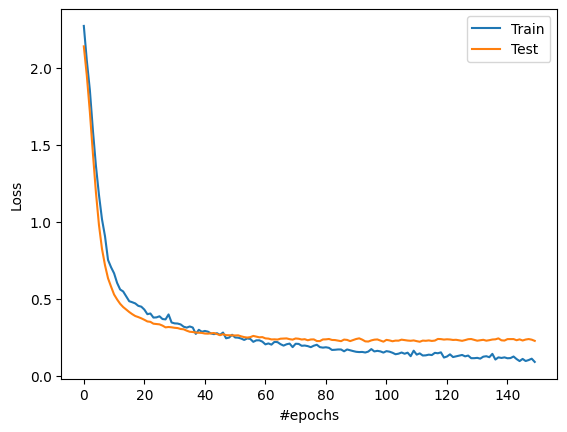

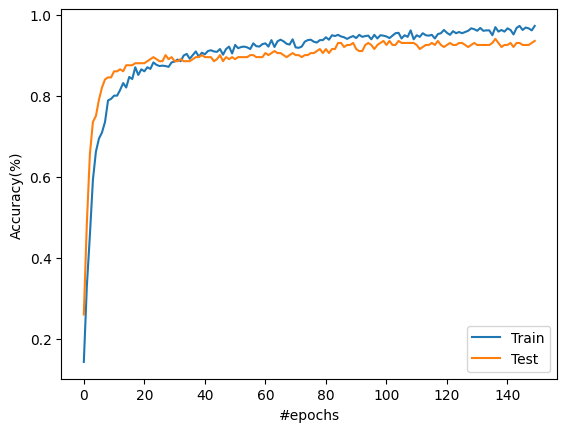

In [7]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ",
      max(history.history['val_accuracy']))

plt.figure(1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()